In [1]:
from KMedoids import KMedoids
import matplotlib.pyplot as plt

#### Util functions

In [2]:
def plot_graphs(data, k_medoids):
    colors = {0:'b*', 1:'g^',2:'ro',3:'c*', 4:'m^', 5:'yo', 6:'ko', 7:'w*'}
    index = 0
    for key in k_medoids.clusters.keys():
        temp_data = k_medoids.clusters[key]
        x = [data[i][0] for i in temp_data]
        y = [data[i][1] for i in temp_data]
        plt.plot(x, y, colors[index])
        index += 1
    plt.title('Cluster formations')
    plt.show()

    medoid_data_points = []
    for m in k_medoids.medoids:
        medoid_data_points.append(data[m])   
    x = [i[0] for i in data]
    y = [i[1] for i in data]
    x_ = [i[0] for i in medoid_data_points]
    y_ = [i[1] for i in medoid_data_points]
    plt.plot(x, y, 'yo')
    plt.plot(x_, y_, 'r*')
    plt.title('Mediods are highlighted in red')
    plt.show()

### Example 1

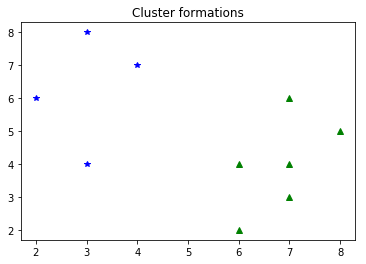

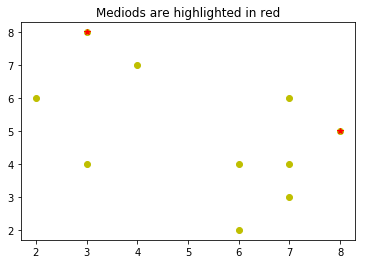

In [5]:
# https://en.wikipedia.org/wiki/K-medoids
data = [[2, 6], [3, 4], [3, 8], [4, 7], [6, 2], [6, 4], [7, 3], [7, 4], [8, 5], [7, 6]]
k_medoids = KMedoids(n_cluster=2)
k_medoids.fit(data)
plot_graphs(data, k_medoids);

### Example 2

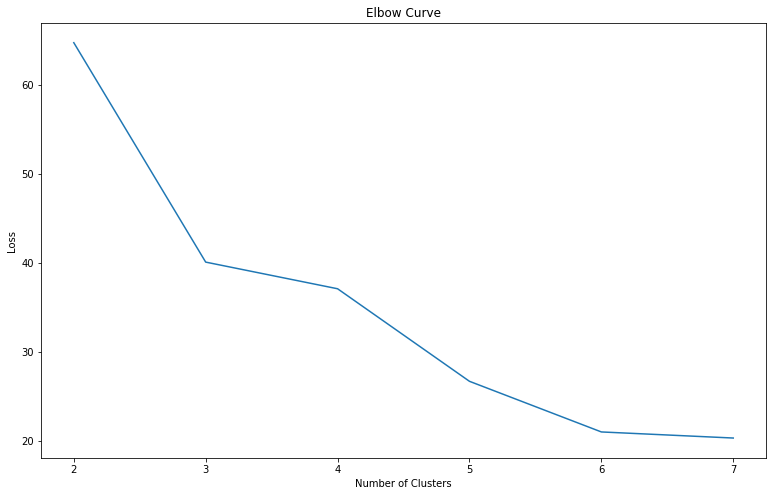

In [12]:
data = [ [2.6, 6], [2.8, 6.8],  [7, 8], [8, 8], [7.4, 7.9], [7.5, 7.2], [7.9, 7],[2.9, 7.4], [3, 5.5], [3.4, 7.2], [3, 7.3], [2.9,6.4], [4.2,6.4], [4.1,7.5], [4.2, 6.9]
       , [6.2, 2.4], [6.6, 2.9], [7.2, 3.6], [7.8, 3.9], [7.9, 2.7], [8, 3.9]
       , [6.8, 6.5], [7.2, 7], [8.2, 7.9]
       , [5.5,4.7], [3.2,3.9], [4, 4.1], [5.2, 4.9], [5.6, 4.4], [6, 5], [4, 3]
       ]
n_clusters = range(2,8)
k_medoids = [KMedoids(n_cluster=i) for i in n_clusters]
k_medoids = [k_medoid.fit(data) for k_medoid in k_medoids]
loss = [k_medoid.current_distance for k_medoid in k_medoids]

# Plot elbow curve (to know best cluster count)
plt.figure(figsize=(13,8))
plt.plot(n_clusters,loss)
plt.xticks(n_clusters)
plt.xlabel('Number of Clusters')
plt.ylabel('Loss')
plt.title('Elbow Curve')
plt.show()

### Observations
1. As number of clusters increases, the loss decreases.
2. After cluster = 6 (i.e., Number of clusters = 6), rate of loss has reduced.
3. Loss at clusters = 6 & clusters = 7 is very small.
4. Lets take clusters = 6 as the best number of clusters

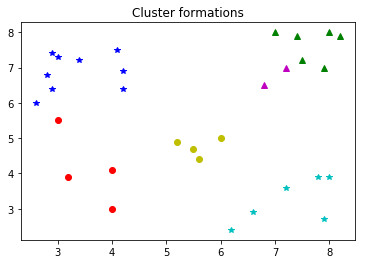

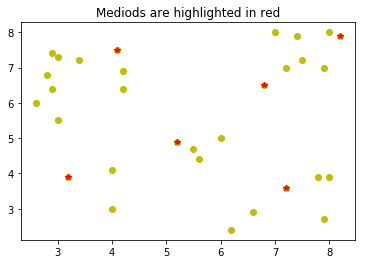

In [13]:
k_medoids = KMedoids(n_cluster=6)
k_medoids.fit(data)
plot_graphs(data, k_medoids);